<h2 align=center> Principal Component Analysis</h2>

### Loading Data and Libraries
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
iris=pd.read_csv('iris.data', 
           header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns=["sepal length", "sepal width", "petal length", "petal width", "species"]
iris.dropna(how='all', inplace=True)
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Visualize the Data
---

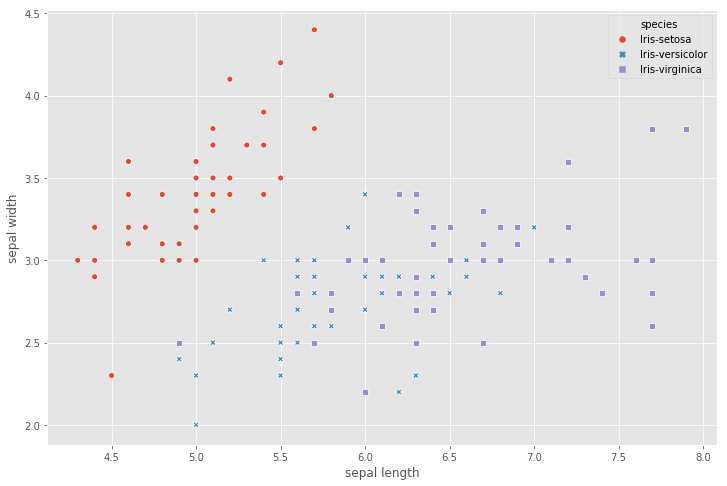

In [6]:
sb.scatterplot(x="sepal length", y="sepal width", 
              hue="species", style="species", data=iris)

### Standardize the Data
---

In [7]:
x=iris.iloc[:, 0:4].values
y=iris.species.values

In [8]:
from sklearn.preprocessing import StandardScaler

x=StandardScaler().fit_transform(x)

### Compute the Eigenvectors and Eigenvalues
---

In [9]:
cov_mat=np.cov(x.T)
print("Covariance matrix:\n", cov_mat)

Covariance matrix:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [10]:
eig_val, eig_vect=np.linalg.eig(cov_mat)
print("Eigenvectors:\n", eig_vect, "\n")
print("Eigenvalues:\n", eig_val)

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]


### Singular Value Decomposition (SVD)
---

In [11]:
eig_vect2, s, v=np.linalg.svd(x.T)
print("Eigenvectors:\n", eig_vect2)

Eigenvectors:
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


### Picking Principal Components Using the Explained Variance
---

In [12]:
var=[(i/sum(eig_val))*100 for i in eig_val]
var

[72.77045209380134, 23.03052326768065, 3.6838319576273775, 0.5151926808906323]

In [13]:
cum_var=np.cumsum(var)
cum_var

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

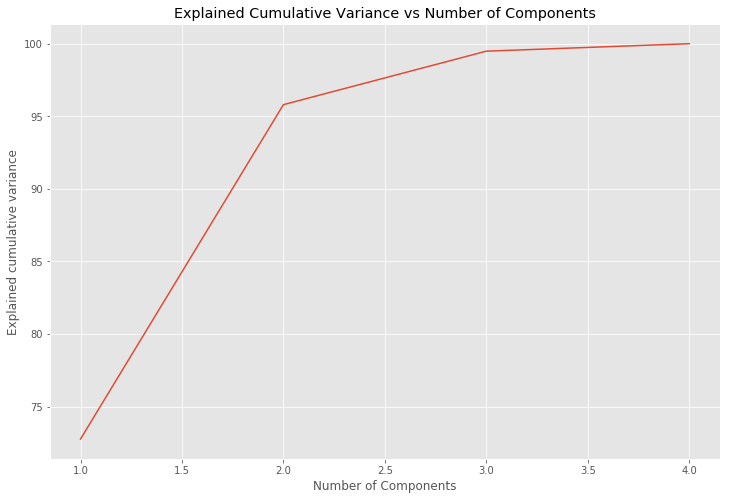

In [14]:
sb.lineplot(x=[1, 2, 3, 4], y=cum_var)
plt.xlabel("Number of Components")
plt.ylabel("Explained cumulative variance") # available in "sklearn" as explained variance ratio
plt.title("Explained Cumulative Variance vs Number of Components")
plt.show()

### Project Data Onto Lower-Dimensional Linear Subspace
---

In [15]:
eig_vect

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [17]:
proj_mat=(eig_vect.T[:][:])[:2].T
print("Projection matrix:\n", proj_mat)

Projection matrix:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [19]:
x_pca=x.dot(proj_mat)
x_pca

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

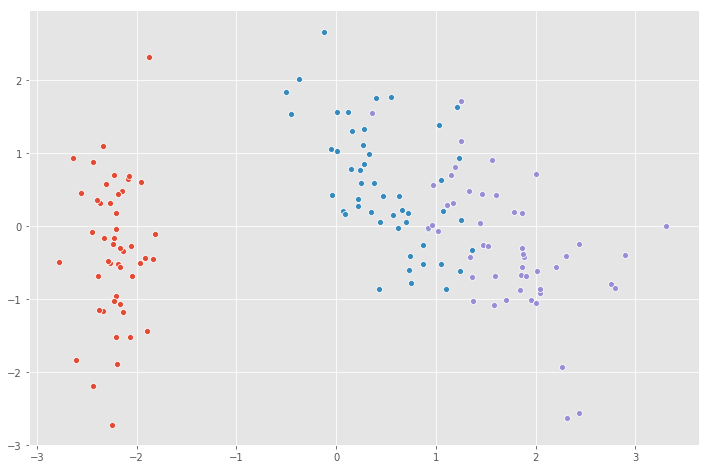

In [20]:
for i in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sb.scatterplot(x_pca[y==i, 0], 
                  x_pca[y==i, 1])